<a href="https://colab.research.google.com/github/drouvotlucas/Mathematical-modelling/blob/main/lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lasso

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Fonctions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [ ]:
#Seuillage des composantes d'un vecteur
def seuille(a, k) :
    # numpy automatically applies functions to each element of the array
    return np.sign(a)*np.maximum(0, np.abs(a) - k)

In [ ]:
#Fonction principale qui effectue les moindres déviations absoluesavec ADMM
def lasso(A, b, x0, u0, z0,lbd,r) :
    x = x0
    z = z0
    u = u0
    tab_i=[]
    tab_min=[]
    epsilon = 0.00001
    iter_max = 1000
    At = np.transpose(A)
    i = 0
    cond=2*epsilon
    x_cho = At@A + r * np.eye(A.shape[1])
    c,low = scipy.linalg.cho_factor(x_cho)
    while (cond>epsilon and i<iter_max) :
        alpha = lbd/r
        xx =  scipy.linalg.cho_solve((c,low), At@b + r*(z - u))
        zz = seuille(xx + u, alpha)
        uu = xx + u - zz
        cond = ((np.sqrt(np.square(np.linalg.norm(xx-x)) + np.square(np.linalg.norm(zz-z)) + np.square(np.linalg.norm(uu-u)))))/np.sqrt(np.square(np.linalg.norm(xx))+ np.square(np.linalg.norm(zz)) + np.square(np.linalg.norm(uu)))
        u = uu
        z = zz
        x = xx
        tab_i.append(i)
        i+= 1
        tab_min.append(0.5*np.linalg.norm(A@x-b, 2)**2 + lbd*np.linalg.norm(x,1))

    return x, i,tab_i,tab_min

##Test avec donnée énoncé

In [ ]:
#Mise en évidence de la solution

A = np.genfromtxt("/content/drive/MyDrive/isima/ISIMA ZZ3/opti convexe/tp2/lasso_A50x100.dat", delimiter=" ", dtype=np.float64)
b = np.genfromtxt("/content/drive/MyDrive/isima/ISIMA ZZ3/opti convexe/tp2/lasso_b50x1.dat", delimiter=" ", dtype=np.float64)

lbd= 0.4095


x0 = np.zeros(np.shape(A)[1])
z0 = np.zeros(np.shape(A)[1])
u0 = np.zeros(np.shape(A)[1])



x,i,tab_i,tab_min=lasso(A, b, x0, z0, u0, lbd,1)
print("lasso = ", 0.5*np.linalg.norm(A@x-b, 2)**2 + lbd*np.linalg.norm(x,1))
print("nombre d'iteration = ", i)

lasso =  14.559966503019593
nombre d'iteration =  76


### Differents affichages

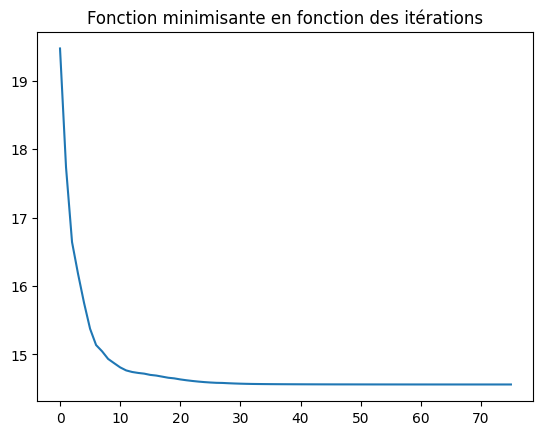

In [ ]:
# Lasso en fonction du nombre d'itération

plt.plot(tab_i, tab_min)
plt.title("Fonction minimisante en fonction des itérations")
plt.show()



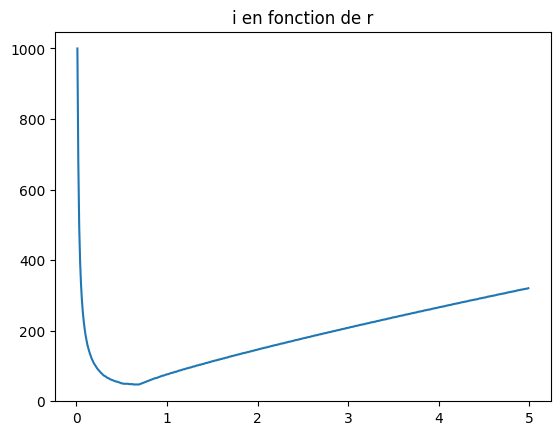

In [ ]:
# nombre d'itération en fonction de r qui varie entre 0.01 et 5
r = np.arange(0.01,5,0.01)
tab_i2=[]
for j in r:
  x,i,tab_i,tab_min=lasso(A, b, x0, z0, u0, lbd,j)
  tab_i2.append(i)
plt.plot(r,tab_i2)
plt.title("i en fonction de r")
plt.show()

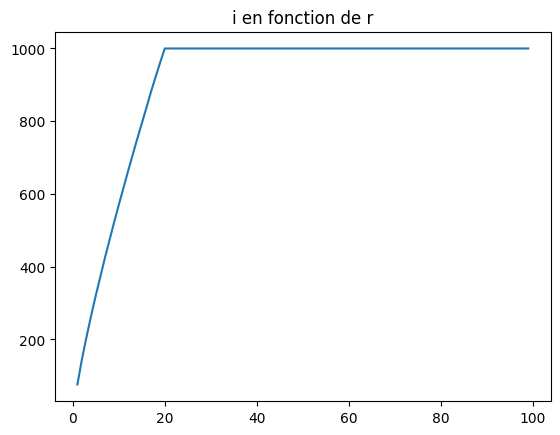

In [ ]:
# nombre d'itération en fonction de r qui varie entre 1 et 1000
r = np.arange(1,100,1)
tab_i2=[]
for j in r:
  x,i,tab_i,tab_min=lasso(A, b, x0, z0, u0, lbd,j)
  tab_i2.append(i)
plt.plot(r,tab_i2)
plt.title("i en fonction de r")
plt.show()


In [ ]:

#PROBLEME DE DONNEES IL N'Y A PAS LE BON NOMBRES DE COLONNES


A2 = np.loadtxt("/content/drive/MyDrive/isima/ISIMA ZZ3/opti convexe/tp2/lasso_A1500x5000 (2).dat")
b2 = np.loadtxt("/content/drive/MyDrive/isima/ISIMA ZZ3/opti convexe/tp2/lasso_b1500x1.dat")

lbd2 = 0.3797


x0_2 = np.zeros(np.shape(A2)[1])
z0_2 = np.zeros(np.shape(A2)[1])
u0_2 = np.zeros(np.shape(A2)[1])



x2,i2,tab_i2,tab_min2=lasso(A2, b2, x0_2, z0_2, u0_2, lbd2,1)
print("lasso = ", 0.5*np.linalg.norm(A2@x2-b2, 2)**2 + lbd2*np.linalg.norm(x2,1))
print("nombre d'iteration = ", i)

lasso =  23.889071293107307
nombre d'iteration =  1000


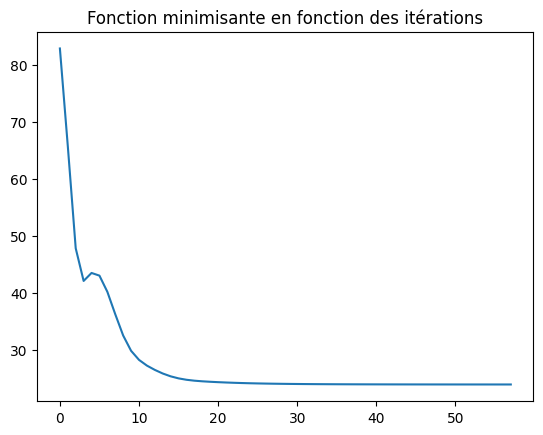

In [ ]:
# Lasso en fonction du nombre d'itération

plt.plot(tab_i2,tab_min2)
plt.title("Fonction minimisante en fonction des itérations")
plt.show()


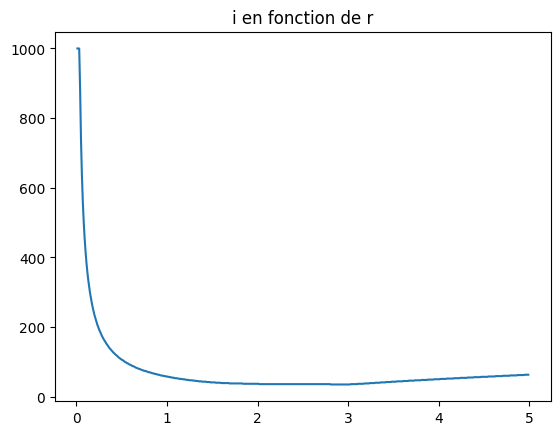

In [ ]:
# nombre d'itération en fonction de r qui varie entre 0.01 et 5
r2 = np.arange(0.01,5,0.01)
tab_i2_2=[]
for j in r2:
  x2,i2,tab_i2,tab_min2=lasso(A2, b2, x0_2, z0_2, u0_2, lbd2,j)
  tab_i2_2.append(i2)
plt.plot(r2,tab_i2_2)
plt.title("i en fonction de r")
plt.show()

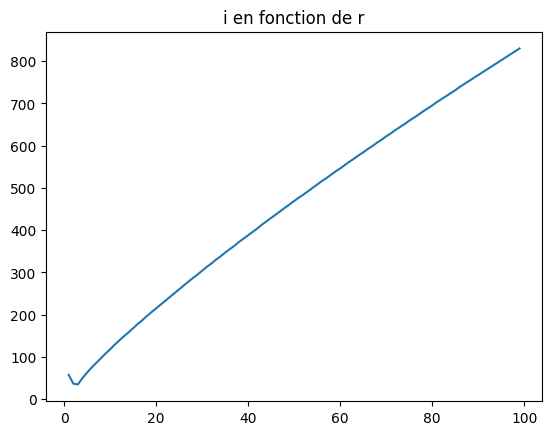

In [ ]:
# nombre d'itération en fonction de r qui varie entre 1 et 1000
r2 = np.arange(1,100,1)
tab_i2_2=[]
for j in r2:
  x2,i2,tab_i2,tab_min2=lasso(A2, b2, x0_2, z0_2, u0_2, lbd2,j)
  tab_i2_2.append(i2)
plt.plot(r2,tab_i2_2)
plt.title("i en fonction de r")
plt.show()